# ECE 466 Homework 5 Solution
---
__Spring 22__
__Due 3/24/2022__

* You can collaborate on homeworks and turn in a homework for 2 people. Make sure both of you submit.
* Include your codes and answers within the cells that are requested. Do not create additional cells. 
* __Upload the `.ipynb` document and a generated `.html` in a zip:__  

**Emre Sofuoglu**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#### 1:

[20] Use the one-sided z-transform to determine $y[n], n\geq 0$ for the following difference equations. Verify your answers `scipy.signal.lfilter` function with the initial conditions. Compare your results for the first 3 time points. 

1. $y[n] -1.5y[n-1]+ 0.5y[n-2] = 0,$ $y[-1]=1,$ $y[-2]=0.$
2. $y[n] = 0.5y[n-1]+x[n],$ $x[n] = (1/3)^nu[n],$ $y[-1]=1.$

__Answer for 1.1:__

See the figure below for the solution of one sided $z$-transform.

![hw5q1_1](hw5q1_1.png)
---

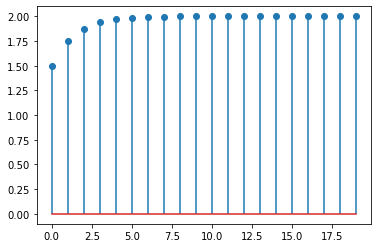

In [2]:
# Your code for 1.1 should be written and executed in this cell.

b = [0]
a = [1, -1.5, 0.5]

n = np.arange(20)
x = np.zeros(20)
Y = [1, 0]
zic = signal.lfiltic(b, a, Y)
y, _ = signal.lfilter(b, a, x, zi = zic)
plt.stem(n, y)
plt.show()


__Answer for 1.2:__

See the figure below for the solution of one sided $z$-transform.

![hw5q1_2](hw5q1_2.png)
---

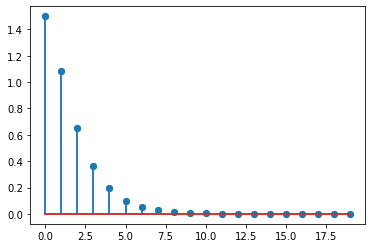

In [3]:
# Your code for 1.2 should be written and executed in this cell.
b = [1]
a = [1, -0.5]
x = (1/3)**n
Y = [1]
zic = signal.lfiltic(b, a, Y)
y, _ = signal.lfilter(b, a, x, zi=zic)
plt.stem(n, y)
plt.stem(n,-2*(1/3)**n+(7/2)*(1/2)**n)
plt.show()

#### 2:

[10 points] Let $x[n]$ be a causal sequence.

1. What conclusion can you draw about the value of its $z$-transform $X(z)$ at $z = \infty$?
2. Use the result in the first part to check which of the following transforms cannot be associated with a causal sequence. 

    a) $X(z)=\frac{(z-0.5)^4}{(z-\frac{1}{3})^3}.$

    b) $X(z)=\frac{\left(1-\frac{1}{2}z^-1\right)^2}{\left(1-\frac{1}{3}z^-1\right)}.$

    c) $X(z)=\frac{(z-\frac{1}{3})^2}{(z-\frac{1}{2})^3}.$

__Answer for 2:__

1. From the $z$ transform definition and the causality of $x[n]$: $X(z) = \sum_{n=0}^\infty x[n] z^{-n}$. Then, $\lim_{z\rightarrow \infty} \sum_{n=0}^\infty x[n] z^{-n}= \sum_{n=0}^\infty x[n] \lim_{z\rightarrow \infty}z^{-n} = x[0] z^{0}= x[0]$, as the value of any power, other than 0, of $z$ will be $0$.

2. From 1., if the sequence is causal, then the sequence needs to converge to a constant value when $z\rightarrow \infty$.
   
    a) $\lim_{z\rightarrow \infty} \frac{(z-0.5)^4}{(z-\frac{1}{3})^3} = \infty$. Thus, this $z$-transform cannot belong to a causal signal.

    b) $\lim_{z\rightarrow \infty}\frac{\left(1-\frac{1}{2}z^-1\right)^2}{\left(1-\frac{1}{3}z^-1\right)} = \lim_{z\rightarrow \infty}\frac{\left(z-\frac{1}{2}\right)^2}{\left(z^2-\frac{1}{3}z\right)} = 1$, so this might belong to a causal signal.

    c) $\lim_{z\rightarrow \infty}\frac{(z-\frac{1}{3})^2}{(z-\frac{1}{2})^3}=0$, so this might also belong to a causal signal.
---

#### 3:

[20 points] Compute the $z$-transform of the following signals and specify their ROC. Determine whether the Fourier transform exists and if it does determine the Fourier transform. 

1. $x[n] = 2^nu[n].$
2. $x[n] = u[n]-u[n-6].$
3. $x[n] = a^n\sin(\omega n)u[n],$ $|a|<1.$
4. $x[n] = -2\delta[n+2]-\delta[n+1]+\delta[n-1]+2\delta[n-2].$


__Answer for 3.1:__

$X(z) = \frac{z}{z-2}, |z|>2$. ROC does not include the unit circle, so the Fourier transform does not exist.

---

__Answer for 3.2:__

$X(z) = 1 + z^{-1} + z^{-2}+ z^{-3} + z^{-4}+ z^{-5},$ ROC is everywhere except $z=0$. ROC includes unit circle and thus, FT exist. In fact we can just replace $z$ with $e^{j\omega}$ to get FT.

$X(\omega) = 1 + e^{-j\omega} + e^{-2j\omega}+ e^{-3j\omega} + e^{-4j\omega}+ e^{-5j\omega} $

---

__Answer for 3.3:__

From the $z$-transform table: $$X(z) = \frac{az^{-1}\sin(\omega_0)}{1-2az^{-1}cos(\omega_0)+a^2z^{-2}}, |z|>|a|.$$

Since $|a|<1$, ROC includes the unit circle, hence, FT exists. We can again set $z=e^{j\omega}.$

$$X(\omega) = \frac{ae^{-j\omega}\sin(\omega_0)}{1-2ae^{-j\omega}cos(\omega_0)+a^2e^{-2j\omega}}.$$

---

__Answer for 3.4:__

$$X(z) = -2z^{2}-z+z^{-1}+2z^{-2},$$ 

ROC is everywhere except $z=0$, and $z=\infty$. Hence FT exists.

$$X(\omega) = -2e^{2j\omega}-e^{j\omega}+e^{-j\omega}+2e^{-2j\omega}$$

---

#### 4:

[20 points] Consider the following periodic signal with period $N=6:$
$$x[n] = \{ \dots ,1,0,1,2,\underline{3},2,1,0,1, \dots \} $$

1. Sketch the signal $x[n]$ and its magnitude and phase spectra by pen and paper (_You can use your tablet if you'd like_). 
2. Using the results in part 1, verify Parseval's relation by computing the power in the time and frequency domains. 

__Answer for 4:__

![hw5q4_1](hw5q4_1.png)
---

#### 5:

[10 points] Determine the signal $x[n]$ if its Fourier transform is as given in the figure below:

![Figure 1](figure1.jpg)


__Answer for 5:__

![hw5q5](hw5q5.png)

---

#### 6:

![Signal $x[n]$](figure2.png)

[20 points] Let $X(\omega)$ denote the Fourier transform of the signal $x[n]$ shown above. Perform the following calculations without explicitly evaluating $X(\omega)$. 

1. Evaluate ܺ$X(0).$
2. Find $\angle X(\omega).$
3. Evaluate $\int_\pi^\pi X(\omega)\delta \omega.$
4. Determine and sketch the signal whose Fourier transform is $Re\{X(\omega)\}.$ 

__Answer for 6:__

![hw5q6](hw5q6.png)

---